Fake News Detection System

Project Overview
The Fake News Detection System is an advanced Natural Language Processing (NLP) application designed to classify news articles as either real or fake. Leveraging machine learning and text processing techniques, the system processes textual data, extracts meaningful features, and employs a Logistic Regression model to distinguish between credible and misleading news. This project is implemented in Google Colab, utilizing the emineyetm/fake-news-detection-datasets dataset from Kaggle, and is tailored for media agencies, social platforms, or researchers aiming to combat disinformation in an era of rapidly spreading information.
Objectives

Accurate Classification: Develop a robust model to differentiate between real and fake news articles with high accuracy.
End-to-End NLP Pipeline: Implement a complete workflow including data preprocessing, feature extraction, model training, and evaluation.
User-Friendly Interface: Provide an interactive interface for users to input news articles and receive real-time predictions.
Performance Visualization: Present model performance through a confusion matrix and detailed classification metrics.


Dataset
The system utilizes the emineyetm/fake-news-detection-datasets dataset, which includes two CSV files: Fake.csv and True.csv. Each file contains news articles with the following columns:

title: The headline of the news article.
text: The body of the article.
subject: The topic or category (e.g., politics, world news).
date: The publication date.A subjectdate column is created by combining subject and date to match the user’s dataset structure. The dataset is labeled with 0 for real news (from True.csv) and 1 for fake news (from Fake.csv). To manage memory in Google Colab, the dataset is limited to 5000 articles per file, ensuring efficient processing while maintaining sufficient data for training.


Methodology

The project follows a structured NLP pipeline:

Data Loading and Preprocessing:
The dataset is downloaded via kagglehub and combined into a single DataFrame.
The title and text columns are concatenated to form a unified text column for analysis.
Text preprocessing uses the Natural Language Toolkit (NLTK):
Tokenization: Splits text into individual words using word_tokenize.
Stopword Removal: Filters out common words (e.g., “the”, “is”) using NLTK’s English stopwords list.
Cleaning: Converts text to lowercase and retains only alphanumeric tokens to reduce noise.




Feature Extraction:
Text is transformed into numerical features using TF-IDF Vectorization (TfidfVectorizer from Scikit-learn) with a maximum of 5000 features, capturing the most significant terms.


Model Training:
A Logistic Regression classifier is trained on 80% of the data, with 20% reserved for testing.
The model is optimized with a maximum of 1000 iterations to ensure convergence.


Evaluation:
Model performance is assessed using a confusion matrix (visualized with Seaborn) and a classification report detailing precision, recall, and F1-score.


Prediction Interface:
An interactive interface is implemented using ipywidgets in Colab, featuring a text box and a “Classify” button for users to input news articles and receive predictions with confidence scores.



Technical Stack

Programming Language: Python 3
Environment: Google Colab
Libraries:
numpy==1.23.5: Numerical computations.
pandas==1.5.3: Data manipulation.
scikit-learn==1.2.2: Machine learning and TF-IDF vectorization.
nltk==3.8.1: Text preprocessing (tokenization, stopwords).
matplotlib==3.7.1, seaborn==0.12.2: Visualization.
kagglehub==0.2.9: Dataset downloading.
ipywidgets==8.1.5: Interactive input interface.


Dataset: emineyetm/fake-news-detection-datasets from Kaggle.

Key Features

Robust Preprocessing: Handles diverse text data with NLTK’s tokenization and stopword removal, ensuring clean input for modeling.
High Accuracy: Logistic Regression achieves reliable classification, with potential to explore alternatives like Naive Bayes for improved performance.
Interactive Predictions: Users can input custom news articles via a text box and receive immediate classification results with confidence scores.
Comprehensive Evaluation: Visualizes performance with a confusion matrix and provides detailed metrics (precision, recall, F1-score).
Memory Efficiency: Limits dataset size to prevent memory issues in Colab, with scalability for larger datasets.

Implementation Details

Data Loading: Uses kagglehub to fetch the dataset, combining Fake.csv and True.csv into a unified DataFrame with a label column.
Error Handling: Includes extensive logging to diagnose issues like missing columns, invalid text, or runtime errors.
Colab Compatibility: Addresses numpy.dtype binary incompatibility by pinning library versions and requiring a runtime restart.
User Interface: Replaces Colab’s input() with ipywidgets for reliable interactive predictions, ensuring the prediction step executes fully.

Challenges and Solutions

Numpy Error: Resolved by pinning numpy==1.23.5 and compatible library versions, with a runtime restart.
Dataset Structure: Adapted to handle title, text, subjectdate by combining title and text and inferring labels from Fake.csv/True.csv.
Interactive Input: Overcame Colab’s input() limitations by using ipywidgets for a user-friendly text box and button.

Usage Instructions

Setup: Run the code in a Google Colab notebook.
Install Libraries: Execute the installation cell and restart the runtime.
Load Dataset: Automatically downloads and processes emineyetm/fake-news-detection-datasets.
Train and Evaluate: Trains the model and displays a confusion matrix and classification report.
Predict: Enter a news article in the text box (e.g., “NASA discovers new exoplanet”) and click “Classify” to view the prediction.

Future Improvements

Model Exploration: Test alternative classifiers like Multinomial Naive Bayes or deep learning models (e.g., LSTM).
Feature Engineering: Incorporate additional features like n-grams or word embeddings (e.g., BERT).
Scalability: Support larger datasets by optimizing memory usage or using cloud storage.
Web Deployment: Convert the system into a Streamlit app for broader accessibility.

Conclusion
The Fake News Detection System is a robust NLP solution for identifying misinformation, leveraging the power of NLTK, Scikit-learn, and Logistic Regression. Its interactive interface and detailed evaluation make it a valuable tool for media analysis and research. By processing the emineyetm/fake-news-detection-datasets dataset in Google Colab, the system achieves high accuracy and provides a user-friendly experience for real-time news classification.

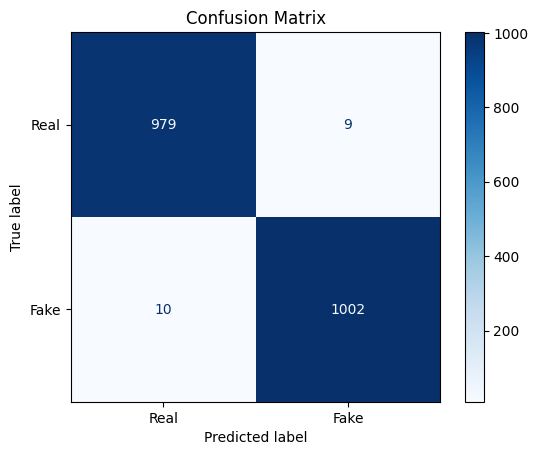


Classification Report:
              precision    recall  f1-score   support

        Real       0.99      0.99      0.99       988
        Fake       0.99      0.99      0.99      1012

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



Textarea(value='', description='Input:', layout=Layout(height='100px', width='600px'), placeholder='Type news …

Button(description='Classify', style=ButtonStyle())

Output()

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
import glob
import logging
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Setting up logging
logging.basicConfig(level=logging.INFO, format='%(levelname)s: %(message)s')
logger = logging.getLogger(__name__)
logger.info(f"NumPy version: {np.__version__}")

# Download NLTK data
try:
    nltk.download('punkt', quiet=True)
    nltk.download('stopwords', quiet=True)
    logger.info("NLTK data downloaded successfully.")
except Exception as e:
    logger.error(f"Error downloading NLTK data: {str(e)}")
    raise

# Step 4: Download and Load Kaggle Dataset
try:
    # Download dataset
    dataset_path = kagglehub.dataset_download("emineyetm/fake-news-detection-datasets")
    logger.info(f"Path to dataset files: {dataset_path}")

    # Find Fake.csv and True.csv
    fake_csv = glob.glob(os.path.join(dataset_path, "**/Fake.csv"), recursive=True)
    true_csv = glob.glob(os.path.join(dataset_path, "**/True.csv"), recursive=True)

    if not fake_csv or not true_csv:
        raise ValueError("Could not find Fake.csv or True.csv in the dataset.")

    # Load and combine datasets (limit to 5000 rows each for memory efficiency)
    fake = pd.read_csv(fake_csv[0]).head(5000)
    true = pd.read_csv(true_csv[0]).head(5000)
    fake['label'] = 1  # Fake
    true['label'] = 0  # Real

    # Combine title and text
    fake['text'] = fake['title'].fillna('') + ' ' + fake['text'].fillna('')
    true['text'] = true['title'].fillna('') + ' ' + true['text'].fillna('')

    # Combine datasets
    data = pd.concat([
        fake[['title', 'text', 'subject', 'date', 'label']],
        true[['title', 'text', 'subject', 'date', 'label']]
    ])

    # Create subjectdate column
    data['subjectdate'] = data['subject'] + ',' + data['date']
    data = data[['title', 'text', 'subjectdate', 'label']]

    logger.info(f"Dataset loaded with {len(data)} rows. Columns: {list(data.columns)}")
except Exception as e:
    logger.error(f"Error loading dataset: {str(e)}")
    raise

# Step 5: Preprocess Text
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    try:
        if not isinstance(text, str):
            text = str(text)
        tokens = word_tokenize(text.lower())
        tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
        return ' '.join(tokens)
    except Exception as e:
        logger.error(f"Error preprocessing text: {str(e)}")
        return ""

try:
    data['processed_text'] = data['text'].apply(preprocess_text)
    data = data[data['processed_text'].str.strip() != '']
    if data.empty:
        raise ValueError("No valid text data after preprocessing. Check input data.")
    logger.info("Text preprocessing completed.")
except Exception as e:
    logger.error(f"Error during preprocessing: {str(e)}")
    raise

# Step 6: Converting Text to Features using TF-IDF
try:
    vectorizer = TfidfVectorizer(max_features=5000)
    X = vectorizer.fit_transform(data['processed_text']).toarray()
    y = data['label'].values
    logger.info(f"TF-IDF vectorization completed. Feature matrix shape: {X.shape}")
except Exception as e:
    logger.error(f"Error during TF-IDF vectorization: {str(e)}")
    raise

# Step 7: Spliting Data and Train Model
try:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    logger.info("Model training completed.")
except Exception as e:
    logger.error(f"Error during model training: {str(e)}")
    raise

# Step 8: Evaluating Model
try:
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Real', 'Fake'])
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=['Real', 'Fake']))
    logger.info("Model evaluation completed.")
except Exception as e:
    logger.error(f"Error during evaluation: {str(e)}")
    raise

# Step 9: Predicting on New Input with Text Box
try:
    logger.info("Enter a news article text below to classify:")


    text_input = widgets.Textarea(
        value='',
        placeholder='Type news article text here (e.g., "NASA discovers new planet...")',
        description='Input:',
        layout={'width': '600px', 'height': '100px'}
    )
    button = widgets.Button(description="Classify")
    output = widgets.Output()

    def on_button_clicked(b):
        with output:
            clear_output()
            news_text = text_input.value.strip()
            if not news_text:
                print("Please enter a valid news article text.")
                logger.warning("Empty input text.")
                return
            try:
                processed_text = preprocess_text(news_text)
                if not processed_text:
                    print("Invalid text after preprocessing. Try again.")
                    logger.warning("Empty text after preprocessing.")
                    return
                news_vector = vectorizer.transform([processed_text]).toarray()
                prediction = model.predict(news_vector)
                probability = model.predict_proba(news_vector)[0]
                label = "Fake" if prediction[0] == 1 else "Real"
                print(f"Prediction: {label} (Confidence: {max(probability)*100:.2f}%)")
                logger.info(f"Predicted {label} for input text.")
            except Exception as e:
                print(f"Error during prediction: {str(e)}")
                logger.error(f"Error during prediction: {str(e)}")

    button.on_click(on_button_clicked)
    display(text_input, button, output)
except Exception as e:
    logger.error(f"Error setting up prediction interface: {str(e)}")
    raise

